In [184]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import loadtxt
from random import *
from sklearn.metrics import accuracy_score
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
%matplotlib inline

In [185]:
ClinicalDF = pd.read_csv('all_clinical.txt', sep='\t')

In [186]:
CibersortDF = pd.read_csv('CIBERSORT.Output_Job30.csv', sep=',')

In [187]:
ClinicalDF.head()

,Unnamed: 0,CASE_ID,AGE,AJCC_METASTASIS_PATHOLOGIC_PM,AJCC_NODES_PATHOLOGIC_PN,AJCC_PATHOLOGIC_TUMOR_STAGE,AJCC_STAGING_EDITION,AJCC_TUMOR_PATHOLOGIC_PT,BRACHYTHERAPY_TOTAL_DOSE_POINT_A,CANCER_TYPE,...,STAGING_SYSTEM,STAGING_SYSTEM_OTHER,SURGERY_FOR_POSITIVE_MARGINS,SURGERY_FOR_POSITIVE_MARGINS_OTHER,SURGICAL_PROCEDURE_FIRST,TISSUE_SOURCE_SITE,TUMOR_STATUS,TUMOR_TISSUE_SITE,VIAL_NUMBER,VITAL_STATUS
0,0,TCGA-A7-A3J0,62.0,M0,N0,Stage IIA,7th,T2,NaN,Breast Cancer,...,Sentinel node biopsy alone,NaN,NaN,NaN,Lumpectomy,A7,TUMOR FREE,Breast,A,Alive
1,1,TCGA-OL-A66N,59.0,MX,N3,Stage IIIC,7th,T3,NaN,Breast Cancer,...,Sentinel node biopsy alone,NaN,NaN,NaN,Modified Radical Mastectomy,OL,TUMOR FREE,Breast,A,Alive
2,2,TCGA-AQ-A0Y5,70.0,MX,N2a,Stage IIIA,7th,T2,NaN,Breast Cancer,...,Sentinel lymph node biopsy plus axillary disse...,NaN,NaN,NaN,Modified Radical Mastectomy,AQ,TUMOR FREE,Breast,A,Dead
3,3,TCGA-E9-A22H,42.0,M0,N1,Stage IIB,7th,T2,NaN,Breast Cancer,...,Axillary lymph node dissection alone,NaN,NaN,NaN,Modified Radical Mastectomy,E9,TUMOR FREE,Breast,A,Alive
4,4,TCGA-BH-A0EB,69.0,M0,N0 (i-),Stage IA,NaN,T1c,H-SCORE 300,Breast Cancer,...,Sentinel lymph node biopsy plus axillary disse...,NaN,NaN,NaN,Other,BH,TUMOR FREE,Breast,A,Alive


In [188]:
CibersortDF.head()

,Input Sample,BC_01,BC_02,BC_03,BC_03LN,BC_04,BC_05,BC_06,BC_07,BC_07LN,BC_08,BC_09,BC_10,BC_11,P-value,Pearson Correlation,RMSE
0,TCGA-3C-AAAU,0.310983,0.365331,0.000000,0.192289,0.063075,0.000000,0.000000,0.000000,0.039817,0.000000,0.000000,0.028505,0.0,0.0,0.244817,1.145978
1,TCGA-3C-AALI,0.000000,0.000000,0.000000,0.064325,0.122605,0.329110,0.039562,0.000000,0.045435,0.106813,0.292151,0.000000,0.0,0.0,0.091914,1.198666
2,TCGA-3C-AALJ,0.213666,0.000000,0.131938,0.160410,0.015300,0.091677,0.000000,0.000000,0.000000,0.066909,0.320100,0.000000,0.0,0.0,0.060049,1.223897
3,TCGA-3C-AALK,0.189579,0.000000,0.030066,0.000000,0.042064,0.173355,0.033569,0.205353,0.000000,0.326013,0.000000,0.000000,0.0,0.0,0.113726,1.189598
4,TCGA-4H-AAAK,0.208831,0.000000,0.009564,0.000000,0.000000,0.233134,0.000000,0.078339,0.000000,0.353810,0.000000,0.116322,0.0,0.0,0.153255,1.173057


In [96]:
ClinicalDF.dropna(subset=['AJCC_PATHOLOGIC_TUMOR_STAGE'], inplace=True)

In [97]:
#ClinicalDF.drop(ClinicalDF.index[73], inplace=True)

In [98]:
CibersortDF = CibersortDF.rename(index=str, columns={"Input Sample": "CASE_ID"})

In [99]:
joined_df = ClinicalDF.merge(CibersortDF, on='CASE_ID', how='inner')

In [100]:
joined_df.head()

,Unnamed: 0,CASE_ID,AGE,AJCC_METASTASIS_PATHOLOGIC_PM,AJCC_NODES_PATHOLOGIC_PN,AJCC_PATHOLOGIC_TUMOR_STAGE,AJCC_STAGING_EDITION,AJCC_TUMOR_PATHOLOGIC_PT,BRACHYTHERAPY_TOTAL_DOSE_POINT_A,CANCER_TYPE,...,BC_06,BC_07,BC_07LN,BC_08,BC_09,BC_10,BC_11,P-value,Pearson Correlation,RMSE
0,2,TCGA-AQ-A0Y5,70.0,MX,N2a,Stage IIIA,7th,T2,NaN,Breast Cancer,...,0.000000,0.000000,0.0,0.341549,0.000000,0.031253,0.000000,0.0,0.226230,1.135645
1,3,TCGA-E9-A22H,42.0,M0,N1,Stage IIB,7th,T2,NaN,Breast Cancer,...,0.000000,0.035424,0.0,0.000000,0.143297,0.000000,0.000000,0.0,0.307108,1.057897
2,6,TCGA-AR-A254,50.0,M0,N2,Stage IIIA,6th,T2,NaN,Breast Cancer,...,0.000000,0.000000,0.0,0.011500,0.353264,0.000000,0.000000,0.0,0.270197,1.106856
3,7,TCGA-EW-A1IW,80.0,MX,N1a,Stage IIB,7th,T2,NaN,Breast Cancer,...,0.034843,0.091170,0.0,0.226853,0.000000,0.000000,0.000000,0.0,0.261124,1.101584
4,16,TCGA-E9-A1N9,58.0,M0,N0,Stage IIA,7th,T2,NaN,Breast Cancer,...,0.000000,0.124163,0.0,0.000000,0.000000,0.000000,0.130834,0.0,0.279115,1.100056


In [101]:
joined_df.AJCC_PATHOLOGIC_TUMOR_STAGE.unique()

array(['Stage IIIA', 'Stage IIB', 'Stage IIA', 'Stage IIIB', 'Stage IIIC',
       'Stage I', 'Stage X', 'Stage IV', 'Stage IA', 'Stage II'],
      dtype=object)

In [102]:
joined_df.columns.values

array(['Unnamed: 0', 'CASE_ID', 'AGE', 'AJCC_METASTASIS_PATHOLOGIC_PM',
       'AJCC_NODES_PATHOLOGIC_PN', 'AJCC_PATHOLOGIC_TUMOR_STAGE',
       'AJCC_STAGING_EDITION', 'AJCC_TUMOR_PATHOLOGIC_PT',
       'BRACHYTHERAPY_TOTAL_DOSE_POINT_A', 'CANCER_TYPE',
       'CANCER_TYPE_DETAILED', 'CENT17_COPY_NUMBER', 'DAYS_TO_BIRTH',
       'DAYS_TO_COLLECTION', 'DAYS_TO_DEATH',
       'DAYS_TO_INITIAL_PATHOLOGIC_DIAGNOSIS', 'DAYS_TO_LAST_FOLLOWUP',
       'DFS_MONTHS', 'DFS_STATUS', 'DISEASE_CODE',
       'ER_POSITIVITY_SCALE_OTHER', 'ER_POSITIVITY_SCALE_USED',
       'ER_STATUS_BY_IHC', 'ER_STATUS_IHC_PERCENT_POSITIVE', 'ETHNICITY',
       'FIRST_SURGICAL_PROCEDURE_OTHER', 'FORM_COMPLETION_DATE', 'GENDER',
       'HER2_AND_CENT17_CELLS_COUNT', 'HER2_AND_CENT17_SCALE_OTHER',
       'HER2_CENT17_RATIO', 'HER2_COPY_NUMBER', 'HER2_FISH_METHOD',
       'HER2_FISH_STATUS', 'HER2_IHC_PERCENT_POSITIVE', 'HER2_IHC_SCORE',
       'HER2_POSITIVITY_METHOD_TEXT', 'HER2_POSITIVITY_SCALE_OTHER',
       'HISTO

In [103]:
ClinicalDF = joined_df.loc[:,'CASE_ID':'VITAL_STATUS']

In [104]:
ClinicalDF.head()

,CASE_ID,AGE,AJCC_METASTASIS_PATHOLOGIC_PM,AJCC_NODES_PATHOLOGIC_PN,AJCC_PATHOLOGIC_TUMOR_STAGE,AJCC_STAGING_EDITION,AJCC_TUMOR_PATHOLOGIC_PT,BRACHYTHERAPY_TOTAL_DOSE_POINT_A,CANCER_TYPE,CANCER_TYPE_DETAILED,...,STAGING_SYSTEM,STAGING_SYSTEM_OTHER,SURGERY_FOR_POSITIVE_MARGINS,SURGERY_FOR_POSITIVE_MARGINS_OTHER,SURGICAL_PROCEDURE_FIRST,TISSUE_SOURCE_SITE,TUMOR_STATUS,TUMOR_TISSUE_SITE,VIAL_NUMBER,VITAL_STATUS
0,TCGA-AQ-A0Y5,70.0,MX,N2a,Stage IIIA,7th,T2,NaN,Breast Cancer,Breast Invasive Ductal Carcinoma,...,Sentinel lymph node biopsy plus axillary disse...,NaN,NaN,NaN,Modified Radical Mastectomy,AQ,TUMOR FREE,Breast,A,Dead
1,TCGA-E9-A22H,42.0,M0,N1,Stage IIB,7th,T2,NaN,Breast Cancer,Breast Invasive Ductal Carcinoma,...,Axillary lymph node dissection alone,NaN,NaN,NaN,Modified Radical Mastectomy,E9,TUMOR FREE,Breast,A,Alive
2,TCGA-AR-A254,50.0,M0,N2,Stage IIIA,6th,T2,NaN,Breast Cancer,Breast Invasive Ductal Carcinoma,...,Sentinel lymph node biopsy plus axillary disse...,NaN,NaN,NaN,Other,AR,NaN,Breast,A,Alive
3,TCGA-EW-A1IW,80.0,MX,N1a,Stage IIB,7th,T2,NaN,Breast Cancer,Breast Invasive Lobular Carcinoma,...,Sentinel lymph node biopsy plus axillary disse...,NaN,NaN,NaN,Other,EW,TUMOR FREE,Breast,A,Alive
4,TCGA-E9-A1N9,58.0,M0,N0,Stage IIA,7th,T2,NaN,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,...,Axillary lymph node dissection alone,NaN,NaN,NaN,NaN,E9,TUMOR FREE,Breast,A,Alive


In [105]:
CibersortDF = joined_df.loc[:,'BC_01':'BC_11']

In [106]:
CibersortDF.insert(0, 'CASE_ID', joined_df.iloc[:,1])

In [107]:
CibersortDF.insert(1, 'AJCC_PATHOLOGIC_TUMOR_STAGE', joined_df.iloc[:,5])

In [108]:
CibersortDF.head()

,CASE_ID,AJCC_PATHOLOGIC_TUMOR_STAGE,BC_01,BC_02,BC_03,BC_03LN,BC_04,BC_05,BC_06,BC_07,BC_07LN,BC_08,BC_09,BC_10,BC_11
0,TCGA-AQ-A0Y5,Stage IIIA,0.015420,0.000000,0.139950,0.000000,0.169214,0.302614,0.000000,0.000000,0.0,0.341549,0.000000,0.031253,0.000000
1,TCGA-E9-A22H,Stage IIB,0.273307,0.183923,0.040314,0.127861,0.000000,0.195873,0.000000,0.035424,0.0,0.000000,0.143297,0.000000,0.000000
2,TCGA-AR-A254,Stage IIIA,0.000000,0.000000,0.000000,0.052432,0.171384,0.411419,0.000000,0.000000,0.0,0.011500,0.353264,0.000000,0.000000
3,TCGA-EW-A1IW,Stage IIB,0.203072,0.000000,0.052599,0.063819,0.001051,0.326592,0.034843,0.091170,0.0,0.226853,0.000000,0.000000,0.000000
4,TCGA-E9-A1N9,Stage IIA,0.135903,0.000000,0.166241,0.174241,0.000000,0.268617,0.000000,0.124163,0.0,0.000000,0.000000,0.000000,0.130834


In [109]:
CibersortDF.to_csv('Predictors.csv', sep=',', index=False)

In [110]:
CibersortDF = CibersortDF.drop(['CASE_ID'], axis=1)

In [111]:
mapping = {'Stage I': 1, 'Stage IA': 2, 'Stage IB': 3, 'Stage II': 4, 'Stage IIA':5, 'Stage IIB':6, 'Stage III':7, 'Stage IIIA':8, 'Stage IIIB':9, 'Stage IIIC':10,'Stage IV':11,  'Stage X':12,}

In [112]:
CibersortDF = CibersortDF.replace({'AJCC_PATHOLOGIC_TUMOR_STAGE': mapping})

# Naive Bayes Classifier

In [113]:
X_train, X_test = train_test_split(CibersortDF, test_size=0.3, random_state=42)

In [114]:
gnb = GaussianNB()

In [115]:
used_features = ['BC_01', 'BC_02', 'BC_03',
       'BC_03LN', 'BC_04', 'BC_05', 'BC_06', 'BC_07', 'BC_07LN', 'BC_08',
       'BC_09', 'BC_10', 'BC_11']

In [116]:
gnb.fit(
    X_train[used_features].values,
    X_train['AJCC_PATHOLOGIC_TUMOR_STAGE']
)

GaussianNB(priors=None)

In [117]:
y_pred = gnb.predict(X_test[used_features])

In [118]:
y_pred

array([ 8,  2,  5,  2,  2,  8,  5,  2,  2,  2,  2,  2,  9,  8,  2,  2,  2,
        2, 10,  5, 10, 10,  5,  2, 11,  9,  2,  2,  2,  5,  8,  2,  1,  5,
       11, 10,  2,  2,  2, 10,  9,  2,  6,  2,  2, 10,  6,  6,  2],
      dtype=int64)

In [119]:
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(
          X_test.shape[0],
          (X_test["AJCC_PATHOLOGIC_TUMOR_STAGE"] != y_pred).sum(),
          100*(1-(X_test["AJCC_PATHOLOGIC_TUMOR_STAGE"] != y_pred).sum()/X_test.shape[0])
))

Number of mislabeled points out of a total 49 points : 43, performance 12.24%


In [120]:
#y_vals = ClinicalDF[["AJCC_PATHOLOGIC_TUMOR_STAGE"]]

In [121]:
print(accuracy_score(X_test['AJCC_PATHOLOGIC_TUMOR_STAGE'], y_pred))

0.12244897959183673


# Linear Regression and Cross Validation Plot

In [189]:
lr = linear_model.LinearRegression()

In [191]:
X = X_train[used_features]
#y = X_train['AJCC_PATHOLOGIC_TUMOR_STAGE']

In [124]:
predicted = cross_val_predict(lr, X , y, cv=10)

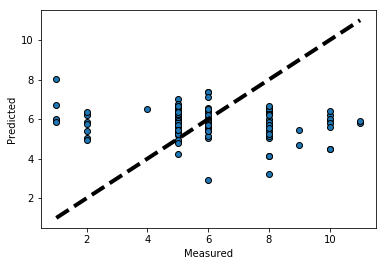

In [125]:
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# Predict Days to Death

In [192]:
ClinicalDF.shape

(1105, 109)

In [193]:
ClinicalDF = ClinicalDF.fillna(ClinicalDF.mean()).dropna(axis=1, how='all')

In [194]:
CibersortDF.shape

(1101, 17)

In [195]:
CibersortDF = CibersortDF.rename(index=str, columns={"Input Sample": "CASE_ID"})

In [196]:
joined_df = ClinicalDF.merge(CibersortDF, on='CASE_ID', how='inner')

In [197]:
joined_df.DAYS_TO_DEATH.unique()

array([1640.27102804,  172.        , 1174.        ,  991.        ,
       2551.        , 2798.        ,  785.        ,  943.        ,
        959.        , 1692.        , 1920.        ,  754.        ,
        749.        , 2373.        ,  860.        , 2965.        ,
       2573.        , 1542.        , 1927.        ,  825.        ,
       4267.        , 1688.        ,  558.        , 1034.        ,
        573.        , 3462.        ,  116.        , 1993.        ,
        426.        , 3063.        ,  811.        , 1759.        ,
       2520.        , 2712.        , 1388.        , 2361.        ,
       3669.        , 4456.        ,  365.        , 3461.        ,
       1430.        , 1563.        , 2483.        , 2469.        ,
        612.        ,  239.        , 2854.        ,  160.        ,
       2009.        , 1009.        , 1508.        , 1142.        ,
        571.        ,  322.        , 3736.        , 1642.        ,
       2273.        , 1032.        , 3941.        , 2097.     

In [198]:
ClinicalDF = joined_df.loc[:,'CASE_ID':'VITAL_STATUS']

In [199]:
CibersortDF = joined_df.loc[:,'BC_01':'BC_11']

In [200]:
CibersortDF.insert(0, 'CASE_ID', joined_df.iloc[:,1])

In [201]:
CibersortDF.insert(1, 'DAYS_TO_DEATH', joined_df.iloc[:,14])

In [202]:
CibersortDF.head()

,CASE_ID,DAYS_TO_DEATH,BC_01,BC_02,BC_03,BC_03LN,BC_04,BC_05,BC_06,BC_07,BC_07LN,BC_08,BC_09,BC_10,BC_11
0,TCGA-A7-A3J0,1640.271028,0.354303,0.000000,0.000000,0.230454,0.031201,0.186856,0.000000,0.000000,0.0,0.000000,0.197185,0.000000,0.000000
1,TCGA-OL-A66N,1640.271028,0.193336,0.000000,0.000000,0.076339,0.000000,0.099043,0.302135,0.045239,0.0,0.262130,0.000000,0.021778,0.000000
2,TCGA-AQ-A0Y5,172.000000,0.048833,0.000000,0.128816,0.027748,0.250986,0.236943,0.000000,0.027265,0.0,0.200007,0.000000,0.079402,0.000000
3,TCGA-E9-A22H,1640.271028,0.175054,0.221322,0.000000,0.184788,0.000000,0.267790,0.000000,0.007576,0.0,0.000000,0.124782,0.000000,0.018688
4,TCGA-BH-A0EB,1640.271028,0.154803,0.048877,0.000000,0.138262,0.000000,0.052319,0.000000,0.147567,0.0,0.166245,0.291928,0.000000,0.000000


In [203]:
X_train, X_test = train_test_split(CibersortDF, test_size=0.3, random_state=42)

In [204]:
lr = linear_model.LinearRegression()

In [205]:
X = X_train[used_features]
y = X_train['DAYS_TO_DEATH']

In [206]:
predicted = cross_val_predict(lr, X , y, cv=10)

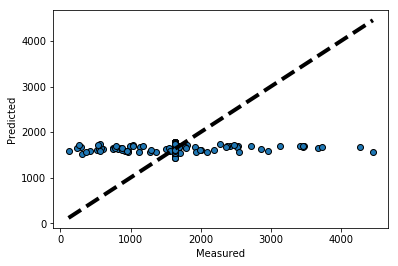

In [209]:
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()